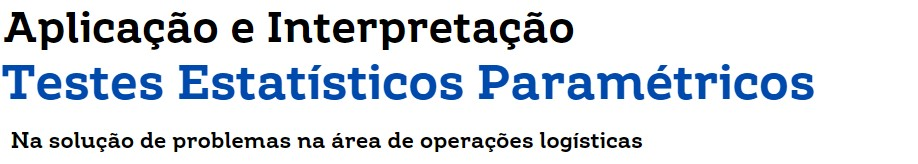

### Instalando e Carregando os Pacotes

In [1]:
# Imports
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_ind, levene, bartlett, f_oneway
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Marcus Lopes" 

Author: Marcus Lopes



### Problema de Negócio 01

**Comparação de Eficiência de Rotas de Transporte**

**Contexto:** Uma empresa de logística opera três rotas diferentes para transportar produtos perecíveis de um centro de distribuição para vários clientes. As rotas são designadas como **Rota A, Rota B e Rota C**. A empresa deseja avaliar se há diferenças significativas no tempo médio de entrega entre essas três rotas, a fim de otimizar o planejamento de transporte e reduzir os custos operacionais.

Contextualização:

* **Rota A:** Utilizada para entregar produtos em áreas urbanas com alto tráfego.
* **Rota B:** Percorre áreas suburbanas com estradas mais largas e menos congestionadas.
* **Rota C:** Direcionada para áreas rurais com estradas sinuosas e menos desenvolvidas.

**Objetivo:**

Determinar se existe uma diferença significativa no tempo médio de entrega entre as três rotas, para que os tomadores de utilizem essas informações para melhorar o planejamento logístico, ajustando recursos e tempos de entrega conforme necessário.

**Importância:**

Compreender esses efeitos é fundamental para a empresa tomar decisões informadas, visando a redução dos custos operacionais ao identificar e promover rotas mais eficientes e a melhoria na satisfação do cliente ao garantir entregas mais rápidas e consistentes.


### 1 - O Teste que será empregado

Analisando o problema de negócio, que envolve a comparação de três ou mais grupos para verificar se pelo menos um difere dos demais, será aplicado o **Teste F (ANOVA de Um Fator).**

* **O teste F** é um procedimento estatístico usado para comparar as médias de três ou mais grupos para determinar se pelo menos um dos grupos difere significativamente dos outros em termos de sua média. 

### 1.1 - Formulação das hipóteses do Teste F (ANOVA de Um Fator)

As hipóteses para este teste são formuladas da seguinte maneira:

* **Hipótese Nula (H0):** Todas as populações das quais as amostras foram retiradas têm a mesma média. Ou seja não existe diferença significativas entre as médias da rotas.
<br>

* **Hipótese Alternativa (H1 ou Ha):** Pelo menos uma das médias de população é diferente. Ou seja existe diferenças significativas em pelo menos umas das médias das rotas
<br>


* **O valor-p no Teste F (ANOVA de Um Fator)** será utilizado para determinar se existe uma diferença estatisticamente significativaentre entre as médias dessas amostras. A interpretação do valor-p depende do nível de significância escolhido para o teste, frequentemente representado por α (alfa).

Os valores mais comuns para α são 0,05 (5%) ou 0,01 (1%).**No nosso caso estamos usando 0,05**

Interpretação do valor-p:

* **Se o valor-p ≤ α:** Há evidências estatísticas suficientes para rejeitar a hipótese nula. Pelo menos uma das médias de população tem uma diferenças significativa.
<br>

* **Se o valor-p > α:** Não há evidências estatísticas suficientes para rejeitar a hipótese nula. Todas as populações das quais as amostras foram retiradas têm a mesma média.

### 1.2 - Suposições que o Teste F (ANOVA de Um Fator) pressupõe

Para verificar as suposições para o teste F (ANOVA de um fator), precisaremos considerar principalmente duas suposições: 

* **Normalidade dos resíduos**
* **Homogeneidade das variâncias entre os grupos**
<br>

1. **Normalidade dos Resíduos**\
A normalidade dos resíduos pode ser verificada usando o teste de Shapiro-Wilk. Contudo, para a ANOVA, o teste é aplicado aos resíduos do modelo, **que são as diferenças entre os valores observados e os valores previstos (ajustados) pelo modelo.** Normalmente, isso exigiria a construção de um modelo ANOVA usando, por exemplo, statsmodels para acessar os resíduos diretamente. Por simplicidade e como não construímos o modelo aqui, podemos verificar a normalidade dos grupos individualmente como uma aproximação inicial.
<br>

2. **Homogeneidade das Variâncias**\
A homogeneidade das variâncias (também conhecida como homocedasticidade) entre os grupos pode ser verificada pelo **teste de Levene ou pelo teste de Bartlett**. O teste de Levene é mais robusto para distribuições que não seguem a normalidade, enquanto o teste de Bartlett é mais sensível a desvios da normalidade.

**Observação:** Para utilizarmos o **teste F (ANOVA de um fator)**, os dados das amostras devem atender a duas suposições: normalidade dos resíduos e homogeneidade das variâncias. Caso não atendam a alguma dessas suposições, testes não paramétricos podem ser a melhor alternativa.

### 1.3- Carregando os Dados do Problema de Negócio

In [3]:
# carregando os daddos das rotas

dfrotas = pd.read_csv("C:\\Arquivos\\rotas09.csv",encoding = "ISO-8859-1")

In [4]:
# Configurando o data ser para mostrar números inteiros sem casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Verificar as primeiras linhas do dataframe
dfrotas.head()

,rota_A_horas_para_entrega,rota_B_horas_para_entrega,rota_C_horas_para_entrega
0,9.23,9.09,9.60
1,8.28,9.23,9.78
2,8.69,8.47,9.51
3,9.57,7.81,8.96
4,9.31,8.79,10.11


### 1.4 -  Calculando as suposições do Teste F (ANOVA de um fator)

* **Normalidade dos resíduos**
* **Homogeneidade das variâncias entre os grupos**

#### 1.4.1 - Calculando a normalidade dos resíduos

In [6]:
# Verificando a suposição de Normalidade dos Resíduos

media_rota_A = np.mean(dfrotas['rota_A_horas_para_entrega'])
media_rota_B = np.mean(dfrotas['rota_B_horas_para_entrega'])
media_rota_C = np.mean(dfrotas['rota_C_horas_para_entrega'])

# Adicionando as médias ao DataFrame
dfrotas['media_rota_A'] = media_rota_A
dfrotas['media_rota_B'] = media_rota_B
dfrotas['media_rota_C'] = media_rota_C


In [7]:
dfrotas.head()

,rota_A_horas_para_entrega,rota_B_horas_para_entrega,rota_C_horas_para_entrega,media_rota_A,media_rota_B,media_rota_C
0,9.23,9.09,9.60,8.31,8.83,9.92
1,8.28,9.23,9.78,8.31,8.83,9.92
2,8.69,8.47,9.51,8.31,8.83,9.92
3,9.57,7.81,8.96,8.31,8.83,9.92
4,9.31,8.79,10.11,8.31,8.83,9.92


In [8]:
# Calculando os resíduos
residuos_rota_A = dfrotas['rota_A_horas_para_entrega']-dfrotas['media_rota_A']
residuos_rota_B = dfrotas['rota_B_horas_para_entrega']-dfrotas['media_rota_B']
residuos_rota_C = dfrotas['rota_C_horas_para_entrega']-dfrotas['media_rota_C']

In [9]:
# Concatenando os resíduos
residuos = np.concatenate([residuos_rota_A, residuos_rota_B, residuos_rota_C])

In [10]:
# Testando a normalidade dos resíduos
_, p_valor_shapiro = shapiro(residuos)
print(f"Valor-p do teste de Shapiro-Wilk para os resíduos: {p_valor_shapiro:.3f}")

# Interpretando o resultado do teste de Shapiro-Wilk
if p_valor_shapiro > 0.05:
    print("Os resíduos seguem uma distribuição normal.")
else:
    print("Os resíduos não seguem uma distribuição normal.")

Valor-p do teste de Shapiro-Wilk para os resíduos: 0.487
Os resíduos seguem uma distribuição normal.


#### 1.4.2 - Calculando homogeneidade das variâncias entre os grupos¶

In [11]:
# Teste de Levene para homogeneidade das variâncias
_, p_levene = levene(dfrotas['rota_A_horas_para_entrega'], 
                     dfrotas['rota_B_horas_para_entrega'], 
                     dfrotas['rota_C_horas_para_entrega'])

# Teste de Bartlett para homogeneidade das variâncias
_, p_bartlett = bartlett(dfrotas['rota_A_horas_para_entrega'], 
                         dfrotas['rota_B_horas_para_entrega'], 
                         dfrotas['rota_C_horas_para_entrega'])

print(f"Valor-P de Levene: {p_levene:.3f}")
print(f"Valor-P de Bartlett: {p_bartlett:.3f}")

Valor-P de Levene: 0.266
Valor-P de Bartlett: 0.136


In [12]:
# Interpretando os resultados

nivel_significancia = 0.05

if p_levene > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Levene).")
else:
    print("Há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Levene).")

if p_bartlett > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Bartlett).")
else:
    print("Há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Bartlett).")

Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Levene).
Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Bartlett).


### 1.5 - Calculando o Teste F (ANOVA de um fator)

In [13]:
# Realizando ANOVA de um fator
f_stat, p_valor = f_oneway(dfrotas['rota_A_horas_para_entrega'], 
                     dfrotas['rota_B_horas_para_entrega'], 
                     dfrotas['rota_C_horas_para_entrega'])


In [14]:
print(f"Estatística F: {f_stat:.3f}")
print(f"Valor-P: {p_valor:.3f}")

Estatística F: 49.457
Valor-P: 0.000


In [15]:
# Interpretando o resultado

nivel_significancia = 0.05

if p_valor <= nivel_significancia:
    print("Há evidências suficientes para rejeitar a hipótese nula.Pelo menos uma das rotas tem uma diferença significativa no tempo médio de entrega.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.Não há diferenças significativas no tempo médio de entrega entre as rotas.")

Há evidências suficientes para rejeitar a hipótese nula.Pelo menos uma das rotas tem uma diferença significativa no tempo médio de entrega.


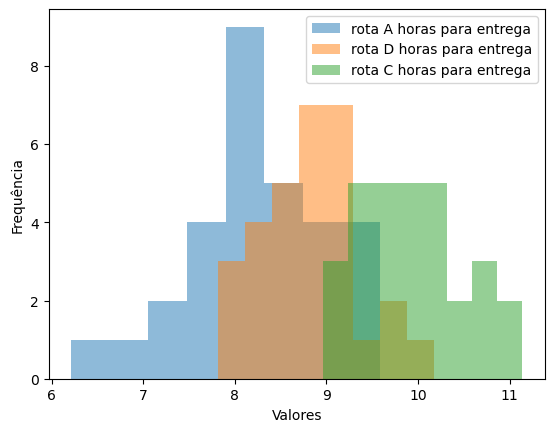

In [16]:
# Visualiza as distribuições das amostras
plt.hist(dfrotas['rota_A_horas_para_entrega'], bins=8, alpha=0.5, label="rota A horas para entrega")
plt.hist(dfrotas['rota_B_horas_para_entrega'], bins=8, alpha=0.5, label="rota D horas para entrega")
plt.hist(dfrotas['rota_C_horas_para_entrega'], bins=8, alpha=0.5, label="rota C horas para entrega")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend()
plt.show()

 ### 1.6- Calculando a variância de cada grupo com ddof=1 para amostra

In [17]:

# Calculando a variância de cada grupo com ddof=1 para amostra
variancia_A = np.var(dfrotas['rota_A_horas_para_entrega'], ddof=1)
variancia_B = np.var(dfrotas['rota_B_horas_para_entrega'], ddof=1)
variancia_C = np.var(dfrotas['rota_C_horas_para_entrega'], ddof=1)

# Mostrando as variâncias
print(f"Variância da Rota A: {variancia_A:.2f}")
print(f"Variância da Rota B: {variancia_B:.2f}")
print(f"Variância da Rota C: {variancia_C:.2f}")

# Verificando qual grupo tem maior variação
max_variancia = max(variancia_A, variancia_B, variancia_C)
if max_variancia == variancia_A:
    print("A Rota A tem a maior variação.")
elif max_variancia == variancia_B:
    print("A Rota B tem a maior variação.")
else:
    print("A Rota C tem a maior variação.")


Variância da Rota A: 0.59
Variância da Rota B: 0.30
Variância da Rota C: 0.34
A Rota A tem a maior variação.


### 1.7 - Recomendação ao Tomador de Decisão

Análise de Variação das Rotas de Entrega

Após realizar uma análise detalhada das variâncias das horas para entrega em três rotas diferentes (A, B e C), obtivemos os seguintes resultados:
<br>

* Variância da Rota A: 0.59
* Variância da Rota B: 0.30
* Variância da Rota C: 0.34
<br>

A variância mede a dispersão dos tempos de entrega em relação à média. Em outras palavras, quanto maior a variância, maior é a inconsistência nos tempos de entrega dessa rota.

### 1.8- **Conclusão:**
<br>

A Rota A apresenta a maior variação (0.59), o que indica que provavelmente há uma maior inconsistência nos tempos de entrega quando comparado com as rotas A e B. Esta alta variação pode causar ineficiências operacionais e insatisfação do cliente devido à imprevisibilidade das entregas.

### 1.8.1- **Recomendações:**

Investigação Detalhada: 

* Realizar uma análise mais aprofundada para identificar as causas da alta variação na Rota A. Isso pode incluir fatores como condições de tráfego, desempenho do motorista, e eficiência do processo de carga e descarga.
<br>

### 1.8.2- **Ações Corretivas:**
<br>

* Implementar medidas para reduzir a variabilidade. Isso pode envolver a otimização das rotas, treinamento adicional para os motoristas, ou melhorias nos procedimentos de logística.
<br>

* Monitoramento Contínuo: Estabelecer um sistema de monitoramento contínuo para acompanhar as variações nas rotas e garantir que as ações corretivas estejam surtindo efeito.



**__________________________________________________________________________________________________**

### Problema de Negócio 02


**Contexto:** Uma empresa de logística está tentando melhorar a eficiência no processo de picking (separação de pedidos) em seus centros de distribuição. Eles têm dois fatores principais que acreditam impactar a acuracidade na separação de pedidos: o tipo de treinamento recebido pelos funcionários e o nível de intensidade do treinamento. A empresa implementou dois tipos de treinamento (A e B) e três níveis de intensidade (Baixo, Médio e Alto).

**Objetivo:**

O objetivo é identificar como o tipo de treinamento e o nível de intensidade impactam a acuracidade no picking e se existe uma interação significativa entre esses fatores. Compreender essas relações ajudará a empresa a otimizar seus processos de treinamento e gerenciamento de intensidade para melhorar a acuracidade no picking, reduzir erros e aumentar a eficiência operacional.


**Importância:**

Redução de Erros e Melhoria na Eficiência: Melhorar a acuracidade de picking pode reduzir o número de erros nas separações de pedidos, o que por sua vez diminui os custos associados a correções e retrabalho.

Otimização de Treinamentos: Entender qual tipo de treinamento é mais eficaz e como o nível de intensidade influencia a acuracidade ajudará a empresa a desenhar programas de treinamento mais eficazes.

Gerenciamento de Intensidade: Ajustar os níveis de intensidade pode otimizar a produtividade sem comprometer a acuracidade, evitando sobrecarga ou falta de desafios.

Satisfação do Cliente: Melhorar a acuracidade no picking contribui para entregas mais precisas e dentro dos prazos, aumentando a satisfação do cliente.


### 1. O Teste que será empregado

Analisando o problema de negócio, que envolve a influência de dois fatores (variáveis independentes) diferentes sobre uma variável dependente, é possível estudar simultaneamente os efeitos principais de cada um dos dois fatores, bem como a possível interação entre eles sobre a variável dependente. O teste que será empregado será a ANOVA de 2 Fatores.

### 1.1- Formulação das hipóteses da ANOVA de 2 Fatores

Ao realizar a ANOVA de dois fatores, verificamos se cada um desses fatores, bem como sua interação, afetam significativamente a variável de resposta.

**Para o fator A:**

* 𝐻0 : Não há diferença significativa entre os níveis do fator A.
* 𝐻1:  Há pelo menos uma diferença significativa entre os níveis do fator A.

**Para o fator B:**

* 𝐻0 : Não há diferença significativa entre os níveis do fator B.
* 𝐻1 : Há pelo menos uma diferença significativa entre os níveis do fator B.

**Para a interação entre A e B:**

* 𝐻0 : Não há interação significativa entre os fatores A e B.
* 𝐻1 : Há uma interação significativa entre os fatores A e B.

### 1.2- Formulação das Suposições da ANOVA de 2 Fatores

As suposições para a realização desse teste são:

**Independência das observações:** Os dados devem ser independentes, ou seja, a medida de uma observação não deve influenciar a medida de outra observação. Isso geralmente é garantido pelo desenho experimental.

**Normalidade:** As distribuições dos resíduos (erros) para cada combinação de níveis dos fatores devem ser aproximadamente normais. Isso pode ser verificado usando gráficos de probabilidade normal ou testes de normalidade, como o teste de Shapiro-Wilk.

**Homogeneidade de variâncias:** As variâncias dos resíduos para cada combinação de níveis dos fatores devem ser iguais. Isso pode ser verificado usando o teste de Levene ou o teste de Bartlett.

É importante verificar essas suposições ao realizar o teste ANOVA de 2 fatores para garantir a validade dos resultados. Caso alguma das suposições não seja atendida, pode ser necessário transformar os dados ou utilizar métodos alternativos de análise.

### 1.3- Carregando os Dados do Problema de Negócio

In [18]:
# Definir parâmetros para geração de dados
 
dados = pd.DataFrame({
    'Acerto_Picking': [90, 80, 95, 82, 82.3, 72.5, 62.8, 53.0, 52.4, 92.6, 92.9, 93.1,
                    71.8, 72.0, 72.2, 82.5, 82.7, 82.9, 93.2, 63.5, 63.1, 63.3, 63.6, 63.8],
    'Treinamento': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
    'intensidade': ['Baixo', 'Baixo', 'Baixo', 'Baixo', 'Medio', 'Medio', 'Medio', 'Medio', 'Alto', 'Alto', 'Alto', 'Alto', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Medio', 'Medio', 'Medio', 'Medio', 'Alto', 'Alto', 'Alto', 'Alto']
})

In [19]:
dados.head()

,Acerto_Picking,Treinamento,intensidade
0,90.00,A,Baixo
1,80.00,A,Baixo
2,95.00,A,Baixo
3,82.00,A,Baixo
4,82.30,A,Medio


### 1.4- Ajustando o modelo

In [20]:
# Ajustando o modelo
modelo = ols('Acerto_Picking ~ C(Treinamento) + C(intensidade) + C(Treinamento):C(intensidade)', data = dados).fit()

### 1.5- Calculando o Teste ANOVA

In [21]:
# Realizando a ANOVA
resultado_anova = sm.stats.anova_lm(modelo, typ = 2)

In [22]:
print(resultado_anova)

                                sum_sq    df     F  PR(>F)
C(Treinamento)                 1920.93  1.00 11.62    0.00
C(intensidade)                10257.73  2.00 31.03    0.00
C(Treinamento):C(intensidade)  1732.85  2.00  5.24    0.02
Residual                       3140.24 19.00   NaN     NaN


**Elementos da tabela ANOVA**

* **sum_sq:** Soma dos quadrados representa a variabilidade total atribuída a cada fonte de variação.

* **df:** Graus de liberdade associados a cada fonte de variação.

* **F:** Estatística F, que é a razão entre a variância média devido a uma fonte de variação e a variância média residual (dentro dos grupos).

* **PR(>F):** Valor-p associado ao teste F, que indica a probabilidade de observar uma estatística F tão extrema quanto, ou mais do que, a estatística calculada, assumindo que a hipótese nula é verdadeira.


### 1.6- Interpretação dos Resultados

**Interpretação dos Resultados:**

### **C(Treinamento):**

**Soma dos Quadrados (sum_sq): 1920.93**\
A alta soma dos quadrados indica uma variação significativa nos acertos de picking devido ao tipo de treinamento. Isso mostra que as diferentes categorias de treinamento têm um impacto importante na eficiência de processamento..

**df (Graus de Liberdade): 1.00**\
Como o fator "Treinamento" tem duas categorias, o grau de liberdade é 1 (2 - 1). Isso é típico para fatores com duas categorias e é necessário para calcular a estatística F.

**F (Estatística F): 11.62**\
Um valor de F de 11.62 indica que a variabilidade nos acertos de picking entre os diferentes tipos de treinamento é muito maior do que a variabilidade dentro dos grupos. Isso sugere que o tipo de treinamento tem um efeito significativo na eficiência de processamento.

**PR(>F) (P-Valor): 0.00**\
Valor-p: Muito abaixo do nível de significância comum de 0.05, indicando que é extremamente improvável observar essa estatística F sob a hipótese nula de que treinamento não afeta o acertos de picking. Isso leva à rejeição da hipótese nula, confirmando que o tipo de treinamento tem um efeito significativo.

### **C(intensidade):**

**sum_sq (Soma dos Quadrados): 10257.73**\
A alta soma dos quadrados (10257.73) indica que a variabilidade na eficiência nos acertos de picking entre os níveis de intensidade (Baixo, Médio, Alto) é significativa, mostrando que o nível de intensidade impacta consideravelmente a eficiência.

**df (Graus de Liberdade): 2.00**\
Isso reflete que o fator intensidade tem três categorias, e a variação entre essas categorias é medida por dois graus de liberdade.

**F (Estatística F): 31.03**\
Um valor de F de 31.03 sugere que as diferenças na eficiência nos acertos de picking entre os diferentes níveis de intensidade são muito maiores do que a variabilidade observada dentro de cada nível de intensidade. Isso indica que o fator intensidade tem um efeito muito forte na eficiência dos acertos de picking.

**PR(>F) (P-Valor): 0.00**\
Valor-p: Muito abaixo do nível de significância comum de 0.05, indicando que é extremamente improvável observar essa estatística F sob a hipótese nula de que intensidade não afeta o acertos de picking. Isso leva à rejeição da hipótese nula, confirmando que inetsidade de treinamento tem um efeito significativo.


### **C(Treinamento)(intensidade):**

**sum_sq (Soma dos Quadrados): 1732.85**\
A alta soma dos quadrados indica que a interação entre o tipo de treinamento e o nível de intensidade é responsável por uma quantidade substancial da variação na eficiência acertos de picking. Em outras palavras, a combinação desses fatores afeta significativamente o desempenho.

**df (Graus de Liberdade): 2.00**\
Reflete o número de parâmetros independentes que estão sendo avaliados para a interação. Com 2 graus de liberdade, estamos testando a influência conjunta dos dois fatores.

**F (Estatística F): 5.24**\
Este valor sugere que a variabilidade explicada pela interação entre os fatores é maior do que a variabilidade residual (não explicada). Isso indica que a interação é um fator importante na eficiência de processamento.

**PR(>F) (P-Valor): 0.02**
O p-valor é 0.02, que é menor que o nível de significância comum (0.05). Isso sugere que a interação entre o tipo de treinamento e o nível de intensidade tem um efeito significativo na acertos de picking. A estatística F indica que a combinação do treinamento e intensidade altera de forma significativa acertos de picking.

### **Residual:**

**sum_sq (Soma dos Quadrados): 3140.24**\
A quantidade de variabilidade não explicada pelo modelo é significativa. Isso sugere que, embora o modelo esteja capturando uma parte da variabilidade nos acertos de picking, ainda há uma quantidade considerável de variabilidade que não é explicada pelos fatores considerados.

**df (Graus de Liberdade): 19.00**\
Indica a quantidade de observações disponíveis para avaliar a variabilidade não explicada após considerar os fatores no modelo. Um número menor de graus de liberdade pode sugerir que o modelo está ajustando bem os dados, mas também pode significar que o modelo pode não estar capturando todos os fatores importantes.

**Interpretação:** Os resíduos representam a variabilidade não explicada pelos fatores e interações do modelo. Os graus de liberdade associados aos resíduos indicam a quantidade de variabilidade não explicada pelo modelo atual.

**Conclusão:**
Os resultados da ANOVA indicam que tanto o tipo de treinamento quanto o nível de intensidade têm efeitos significativos na eficiência nos acertos de picking, e há uma interação significativa entre esses dois fatores. Em resumo:

**Treinamento:** Tem um efeito significativo na eficiência nos acertos de picking.\
**Intensidade:** Tem um efeito significativo na eficiência nos acertos de picking.\
**Interação Treinamento x Intensidade:** A interação entre treinamento e intensidade também é significativa, sugerindo que a combinação dos dois fatores afeta a eficiência nos acertos de picking de maneira não linear.

### 1.7- Validando as Suposições da ANOVA de 2 Fatores

In [23]:
# Resíduos do modelo
residuos = modelo.resid

In [24]:
# Verificando a normalidade dos resíduos
_, p_valor_shapiro = shapiro(residuos)
print(f'Valor-P do teste de Shapiro-Wilk: {p_valor_shapiro}')

Valor-P do teste de Shapiro-Wilk: 0.46071353554725647


O teste de Shapiro-Wilk foi utilizado para verificar a normalidade dos resíduos. O resultado do valor-p é bastante alto, significando que não há evidências suficientes para rejeitar a hipótese nula de normalidade. Em outras palavras, com base nesse teste, você pode assumir que os resíduos seguem uma distribuição normal, o que é uma das suposições importantes para a validade do teste ANOVA.

Em geral, um valor-p maior que 0.05 no teste de Shapiro-Wilk indica que os resíduos podem ser considerados normalmente distribuídos, enquanto um valor-p menor que 0.05 sugere que os resíduos podem não ser normalmente distribuídos, violando assim essa suposição da ANOVA. Em nosso caso, a suposição de normalidade foi atendida.

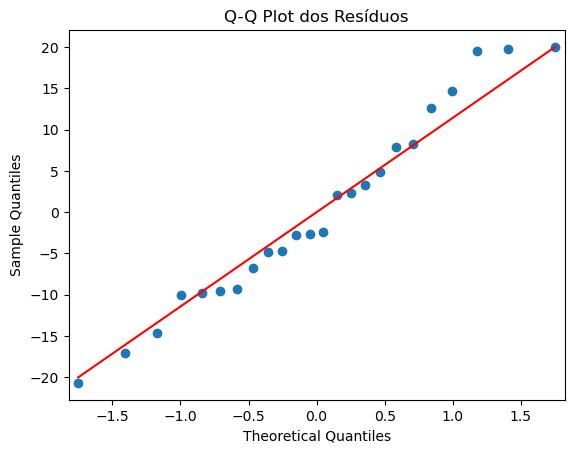

In [25]:
# Gráfico de probabilidade normal (Q-Q plot) dos resíduos
import matplotlib.pyplot as plt
sm.qqplot(residuos, line = 's')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

In [26]:
# Verificando a homogeneidade das variâncias
_, p_valor_levene = levene(dados['Acerto_Picking'][dados['Treinamento'] == 'A'], 
                           dados['Acerto_Picking'][dados['Treinamento'] == 'B'])
print(f'Valor-p do teste de Levene: {p_valor_levene}')

Valor-p do teste de Levene: 0.7738486833140091


O teste de Levene foi utilizado para verificar a homogeneidade das variâncias, ou seja, se as variâncias dos resíduos são iguais entre os grupos. Em nosso caso o valor-p do teste de Levene é é maior que o nível de significância de 0.05

Um valor-p maior que 0.05 geralmente indica que não há evidências suficientes para rejeitar a hipótese nula de igualdade das variâncias. Portanto, com base nesse teste, as variâncias dos resíduos são homogêneas entre os grupos, o que é outra suposição atendida para a validade do teste ANOVA.

As conclusões da ANOVA podem ser usadas com segurança.



A definição de H0 e H1 em um teste estatístico segue um princípio fundamental da metodologia científica e estatística. A hipótese nula geralmente representa a ideia de "não há efeito" ou "não há diferença", enquanto a hipótese alternativa sugere que "há um efeito" ou "há uma diferença". Esta escolha não é arbitrária, mas sim orientada pelo objetivo de prover uma afirmação clara que possa ser testada objetivamente.

In [27]:
%reload_ext watermark
%watermark -a "Marcus lopesy"

Author: Marcus lopesy



## FIM